## Fuzzy shadow banning system

for context a personal project I have running in the backround involves filtering through large amounts of tweets and tweet like social media posts.

and a figured fuzzy sets would be a rather natural way for one to remove a certain level of the toxicity from your twitter posts.

now for context I orginally wanted to test this on a rather large set of reddit comments I've been toying around with recently 

https://www.kaggle.com/datasets/kaggle/reddit-comments-may-2015

eventually relized that may been a bit over kill for this assignment.

so I just wrote a tiny simulation with randomly generated values for rankings and swear word counts

with the overall idea being to make a balance in your social media feeds. between the amount engagment a post gets vs how toxic it is (represented by the amount of swearwords that are in a hypothical social media post)

In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

upvotes = ctrl.Antecedent(np.arange(-100, 1000 , 1), 'upvotes')
swearWords = ctrl.Antecedent(np.arange(0, 10, 1), 'swearWords')
ranking = ctrl.Consequent(np.arange(0, 100, 1), 'ranking')

In [2]:

upvotes['low'] = fuzz.trimf(upvotes.universe, [-100, -100, 200])
upvotes['medium'] = fuzz.trapmf(upvotes.universe, [100, 200, 500, 600])
upvotes['high'] = fuzz.trimf(upvotes.universe, [450, 1000, 1000])

swearWords['low'] = fuzz.trimf(swearWords.universe, [0, 0, 6])
swearWords['high'] = fuzz.trimf(swearWords.universe, [3, 10, 10])

ranking.automf(3)


/home/sindri/miniconda3/envs/fuzzy_sets/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


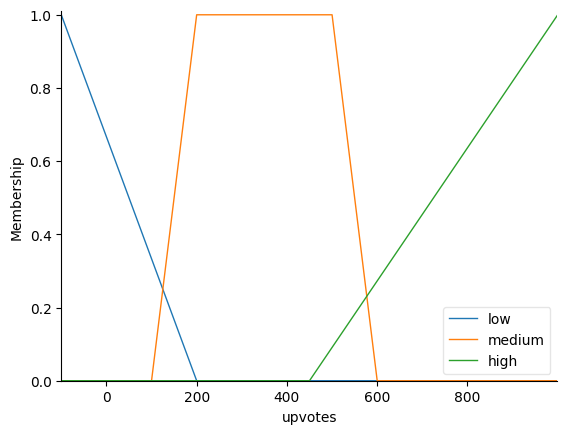

In [3]:
upvotes.view()

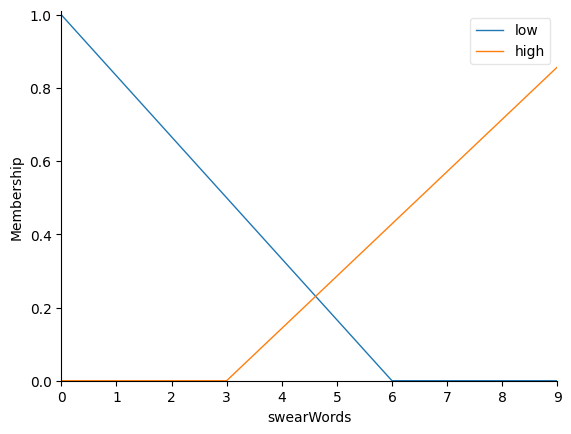

In [4]:
swearWords.view()

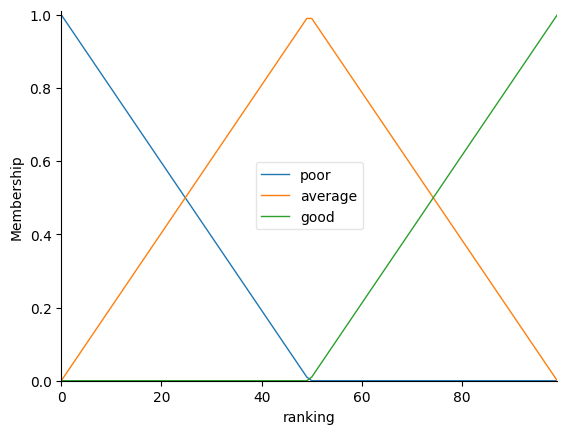

In [5]:
ranking.view()

In [11]:
rule1 = ctrl.Rule(upvotes['low'] & swearWords['low'], ranking['poor'])
rule3 = ctrl.Rule(upvotes['high'] & swearWords['low'], ranking['good'])
rule4 = ctrl.Rule(upvotes['high'] & swearWords['high'], ranking['poor'])
rule5 = ctrl.Rule(upvotes['medium'] & swearWords['low'], ranking['poor'])
rule6 = ctrl.Rule(upvotes['medium'] & swearWords['high'], ranking['average'])
rule7 = ctrl.Rule(upvotes['low'] & swearWords['high'], ranking['poor'])


In [13]:
ranking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

In [14]:
ranking_sim = ctrl.ControlSystemSimulation(ranking_ctrl)


In [15]:
postList = []

In [16]:
for score, swears in zip(np.random.randint(-100, 1000, size=50), np.random.randint(0, 10, size=50)):
    ranking_sim.input['upvotes'] = score
    ranking_sim.input['swearWords'] = swears 
    
    ranking_sim.compute()
     
    postList.append(( int(score), int(swears), int(ranking_sim.output['ranking'])))
    


pay attention to the third column since that is the finaly ranking

In [17]:
postList

[(-63, 0, 16),
 (203, 6, 49),
 (326, 7, 49),
 (370, 6, 49),
 (719, 4, 60),
 (828, 8, 17),
 (456, 5, 48),
 (233, 2, 42),
 (531, 7, 48),
 (20, 5, 21),
 (906, 7, 18),
 (572, 3, 48),
 (781, 4, 60),
 (91, 8, 20),
 (993, 6, 19),
 (481, 7, 49),
 (478, 2, 42),
 (660, 3, 78),
 (888, 0, 81),
 (683, 3, 79),
 (577, 5, 48),
 (359, 4, 47),
 (108, 3, 33),
 (59, 9, 19),
 (87, 3, 20),
 (673, 6, 20),
 (837, 8, 17),
 (528, 9, 48),
 (909, 4, 60),
 (430, 8, 49),
 (741, 0, 80),
 (432, 9, 49),
 (559, 7, 48),
 (831, 0, 81),
 (252, 0, 41),
 (491, 1, 41),
 (66, 0, 19),
 (846, 0, 81),
 (9, 6, 19),
 (-14, 0, 17),
 (231, 1, 41),
 (477, 7, 49),
 (333, 4, 47),
 (-52, 7, 18),
 (-71, 5, 21),
 (163, 6, 49),
 (794, 8, 18),
 (999, 5, 42),
 (308, 0, 41),
 (292, 7, 49)]

In [20]:

sorted(postList, key=lambda intputList : intputList[2] )

[(-63, 0, 16),
 (828, 8, 17),
 (837, 8, 17),
 (-14, 0, 17),
 (906, 7, 18),
 (-52, 7, 18),
 (794, 8, 18),
 (993, 6, 19),
 (59, 9, 19),
 (66, 0, 19),
 (9, 6, 19),
 (91, 8, 20),
 (87, 3, 20),
 (673, 6, 20),
 (20, 5, 21),
 (-71, 5, 21),
 (108, 3, 33),
 (252, 0, 41),
 (491, 1, 41),
 (231, 1, 41),
 (308, 0, 41),
 (233, 2, 42),
 (478, 2, 42),
 (999, 5, 42),
 (359, 4, 47),
 (333, 4, 47),
 (456, 5, 48),
 (531, 7, 48),
 (572, 3, 48),
 (577, 5, 48),
 (528, 9, 48),
 (559, 7, 48),
 (203, 6, 49),
 (326, 7, 49),
 (370, 6, 49),
 (481, 7, 49),
 (430, 8, 49),
 (432, 9, 49),
 (477, 7, 49),
 (163, 6, 49),
 (292, 7, 49),
 (719, 4, 60),
 (781, 4, 60),
 (909, 4, 60),
 (660, 3, 78),
 (683, 3, 79),
 (741, 0, 80),
 (888, 0, 81),
 (831, 0, 81),
 (846, 0, 81)]